# **CSE343: *Machine Learning Assignment-3***

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## **Section B (Scratch Implementation)**

In [2]:
from utils import NeuralNetwork
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **Sanity Check**

As a sanity check, we visualize 10 random samples from the training dataset along with their labels.

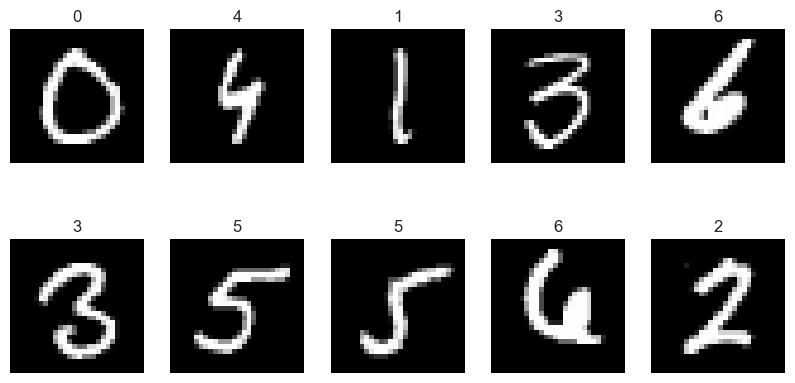

In [4]:
plt.figure(figsize=(10, 5))

indices = np.random.randint(0, x_train.shape[0], 10)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[indices[i]].reshape(28, 28), cmap="gray")
    plt.title(y_train[indices[i]])
    plt.axis("off")

### **Preprocessing the Data**

Before training the Neural Network, we must preprocess the data. We will normalize the images bringing them to the range $[0, 1]$, and then standard scale them, and then flatten them.

In [5]:
x_train, x_test = x_train/255, x_test/255
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
x_train, x_test = (x_train-x_train.mean())/x_train.std(), (x_test-x_test.mean())/x_test.std()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

### **Training the Neural Network**

We will train the Neural Network using the training dataset.

In [6]:
NN_sig = NeuralNetwork(6, [256, 128, 64, 32], activation="sigmoid", epochs=100)
NN_sig.fit(x_train, y_train, x_val, y_val)
NN_sig.train(verbose=True)

In [7]:
NN_tanh = NeuralNetwork(6, [256, 128, 64, 32], activation="tanh", epochs=100, alpha=0.005)
NN_tanh.fit(x_train, y_train, x_val, y_val)
NN_tanh.train(verbose=True)

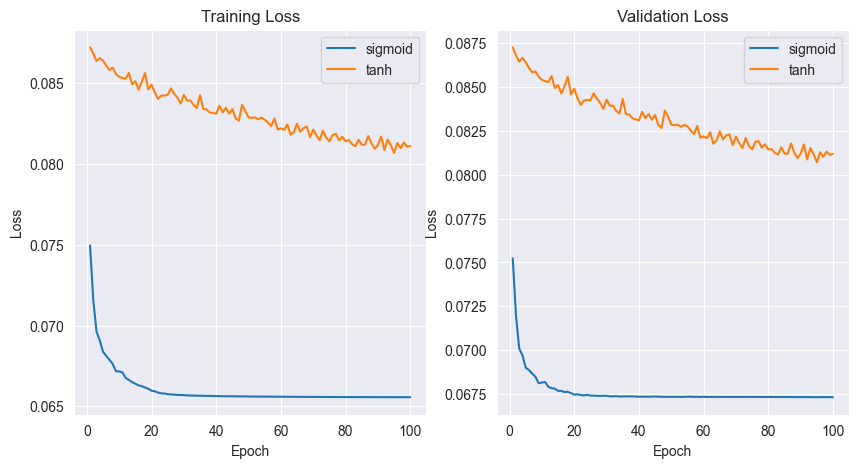

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, NN_sig.epochs+1), NN_sig.train_loss, label="sigmoid")
plt.plot(np.arange(1, NN_tanh.epochs+1), NN_tanh.train_loss, label="tanh")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, NN_sig.epochs+1), NN_sig.valid_loss, label="sigmoid")
plt.plot(np.arange(1, NN_tanh.epochs+1), NN_tanh.valid_loss, label="tanh")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

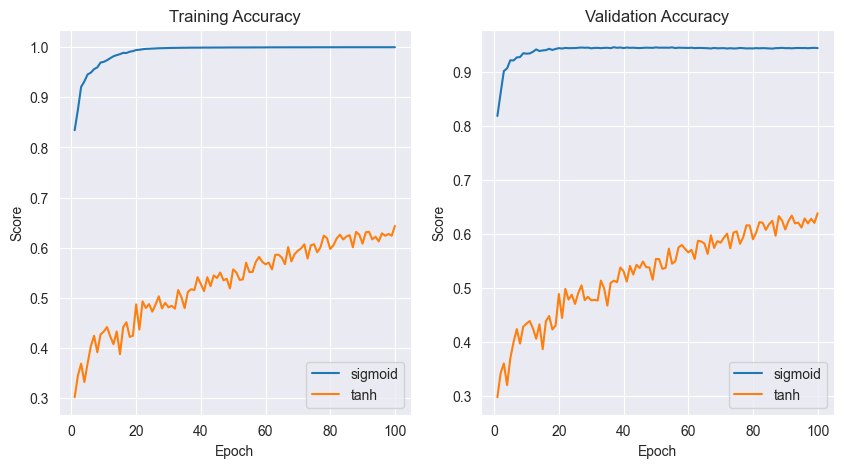

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.plot(np.arange(1, NN_sig.epochs+1), NN_sig.train_accuracy, label="sigmoid")
plt.plot(np.arange(1, NN_tanh.epochs+1), NN_tanh.train_accuracy, label="tanh")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, NN_sig.epochs+1), NN_sig.valid_accuracy, label="sigmoid")
plt.plot(np.arange(1, NN_tanh.epochs+1), NN_tanh.valid_accuracy, label="tanh")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

plt.show()

In [10]:
NN_sig.score(x_test, y_test), NN_tanh.score(x_test, y_test)

(0.9468, 0.6583)

## **Section C (Algorithm Implementation using Packages)**

In [33]:
from scipy.io import loadmat
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### **Data Preparation**

In [3]:
data = loadmat("train_32x32.mat")
X, y = data["X"], data["y"]

#### **Train-Test Split**

We split the entire dataset into 3 parts, with 20% Validation Data, 10% Test Data and 70% Training Data.

In [4]:
X = np.moveaxis(X, -1, 0)
y = y.reshape(-1) % 10

In [5]:
x_train, x_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=1/3, random_state=42)

print("Total number of samples:", X.shape[0])
print("Number of training samples: ", x_train.shape[0], " (ratio = ", round(x_train.shape[0]/X.shape[0], 2), ")", sep="")
print("Number of validation samples: ", x_val.shape[0], " (ratio = ", round(x_val.shape[0]/X.shape[0], 2), ")", sep="")
print("Number of testing samples: ", x_test.shape[0], " (ratio = ", round(x_test.shape[0]/X.shape[0], 2), ")", sep="")

Total number of samples: 73257
Number of training samples: 51279 (ratio = 0.7)
Number of validation samples: 14652 (ratio = 0.2)
Number of testing samples: 7326 (ratio = 0.1)


#### **Distribution of Class Labels in Train, Validation and Test Set**

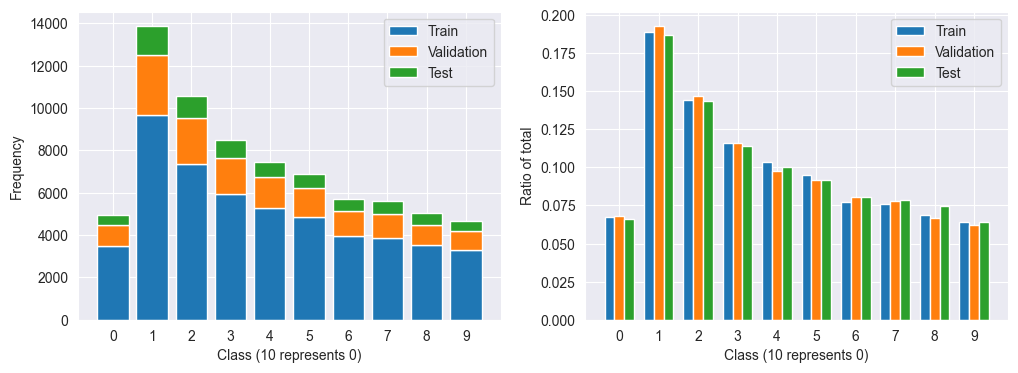

In [6]:
train_counts = np.unique(y_train, return_counts=True)[1]
val_counts = np.unique(y_val, return_counts=True)[1]
test_counts = np.unique(y_test, return_counts=True)[1]

labels = np.arange(10)

plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.bar(labels, train_counts, label="Train")
plt.bar(labels, val_counts, label="Validation", bottom=train_counts)
plt.bar(labels, test_counts, label="Test", bottom=train_counts+val_counts)
plt.xticks(labels)
plt.xlabel("Class (10 represents 0)")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)

plt.bar(labels-0.25, train_counts/np.sum(train_counts), width=0.25, label="Train")
plt.bar(labels, val_counts/np.sum(val_counts), width=0.25, label="Validation")
plt.bar(labels+0.25, test_counts/np.sum(test_counts), width=0.25, label="Test")
plt.xticks(labels)
plt.xlabel("Class (10 represents 0)")
plt.ylabel("Ratio of total")
plt.legend()

plt.show()

#### **Sanity Check**

It is always good to check the data before continuing. As a sanity check, we visualize 10 random samples from each of the 10 categories.

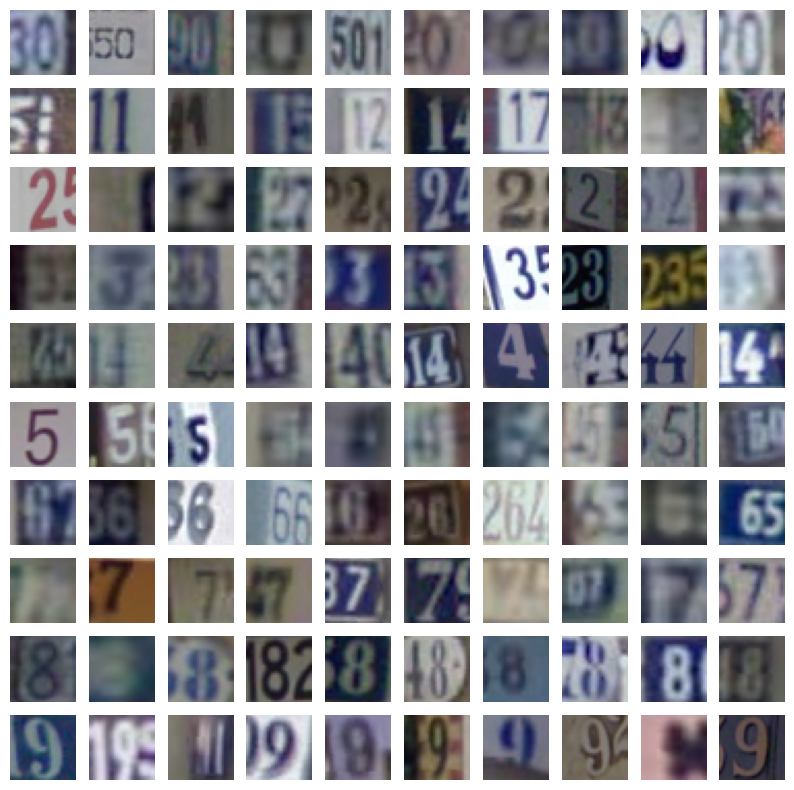

In [7]:
# Visualize 10 random images from each class

plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    class_i = np.where(y_train == i)[0]
    for j in range(10):
        plt.subplot(10, 10, i*10+j+1)
        plt.imshow(x_train[np.random.choice(class_i)])
        plt.axis("off")

plt.show()

### **Model Training and Activation Functions**

First, we train a simple MLP Model with two hidden layers (excluding input and final layers) to classify the data into the 10 classes. But before training, we preprocess our data a little.

In [8]:
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_val = std_scaler.transform(x_val.reshape(x_val.shape[0], -1))
x_test = std_scaler.transform(x_test.reshape(x_test.shape[0], -1))

x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=15, verbose=True, random_state=42)
clf.fit(x_train, y_train)

Iteration 1, loss = 1.49170181
Iteration 2, loss = 0.97504402
Iteration 3, loss = 0.83457693
Iteration 4, loss = 0.75711931
Iteration 5, loss = 0.69976052
Iteration 6, loss = 0.65292330
Iteration 7, loss = 0.61002065
Iteration 8, loss = 0.58329590
Iteration 9, loss = 0.55856514
Iteration 10, loss = 0.53765759
Iteration 11, loss = 0.51925323
Iteration 12, loss = 0.49655807
Iteration 13, loss = 0.49330987
Iteration 14, loss = 0.48328180
Iteration 15, loss = 0.46061968


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=15, random_state=42,
              verbose=True)

In [10]:
print("Accuracy on validation set:", clf.score(x_val, y_val))
print("Accuracy on test set:", clf.score(x_test, y_test))

Accuracy on validation set: 0.8086268086268086
Accuracy on test set: 0.80999180999181


In [11]:
# GridSearch to find the optimal hyperparameters

param_grid = {
    "hidden_layer_sizes": [(32, 64), (64, 128), (128, 128)],
    "activation": ["logistic", "relu", "tanh"],
    "alpha": [0.0001, 0.05],
    "batch_size": [250, 500, 1000],
}

clf = MLPClassifier(max_iter=10, verbose=True, random_state=42)
grid = GridSearchCV(clf, param_grid, cv=3, verbose=10)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/54] START activation=logistic, alpha=0.0001, batch_size=250, hidden_layer_sizes=(32, 64)


Iteration 1, loss = 2.23624175
Iteration 2, loss = 2.19727233
Iteration 3, loss = 2.15952988
Iteration 4, loss = 2.11405195
Iteration 5, loss = 2.05020169
Iteration 6, loss = 1.96099681
Iteration 7, loss = 1.86613412
Iteration 8, loss = 1.76976974
Iteration 9, loss = 1.67266924
Iteration 10, loss = 1.58043712
[CV 1/3; 1/54] END activation=logistic, alpha=0.0001, batch_size=250, hidden_layer_sizes=(32, 64);, score=0.488 total time=  15.4s
[CV 2/3; 1/54] START activation=logistic, alpha=0.0001, batch_size=250, hidden_layer_sizes=(32, 64)
Iteration 1, loss = 2.23493700
Iteration 2, loss = 2.19499147
Iteration 3, loss = 2.15690749
Iteration 4, loss = 2.11831157
Iteration 5, loss = 2.07014415
Iteration 6, loss = 1.99625771
Iteration 7, loss = 1.89110820
Iteration 8, loss = 1.78637809
Iteration 9, loss = 1.67679609
Iteration 10, loss = 1.57943475
[CV 2/3; 1/54] END activation=logistic, alpha=0.0001, batch_size=250, hidden_layer_sizes=(32, 64);, score=0.479 total time=  16.1s
[CV 3/3; 1/54] S

GridSearchCV(cv=3,
             estimator=MLPClassifier(max_iter=10, random_state=42,
                                     verbose=True),
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.0001, 0.05],
                         'batch_size': [250, 500, 1000],
                         'hidden_layer_sizes': [(32, 64), (64, 128),
                                                (128, 128)]},
             verbose=10)

In [12]:
grid.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 250,
 'hidden_layer_sizes': (128, 128)}

In [13]:
clf_star = grid.best_estimator_
clf_star.fit(x_train, y_train)

Iteration 1, loss = 1.56484669
Iteration 2, loss = 1.01023409
Iteration 3, loss = 0.87315308
Iteration 4, loss = 0.79345757
Iteration 5, loss = 0.73222480
Iteration 6, loss = 0.68970722
Iteration 7, loss = 0.66325624
Iteration 8, loss = 0.62914083
Iteration 9, loss = 0.61084688
Iteration 10, loss = 0.58955292


MLPClassifier(alpha=0.05, batch_size=250, hidden_layer_sizes=(128, 128),
              max_iter=10, random_state=42, verbose=True)

In [14]:
print("Validation accuracy:", clf_star.score(x_val, y_val))
print("Test accuracy:", clf_star.score(x_test, y_test))

Validation accuracy: 0.7996177996177997
Test accuracy: 0.8038493038493039


#### **Training the model with various activation functions**

We train different models with activation functions: sigmoid, ReLU, tanh, and linear.

In [35]:
clf_sigmoid = MLPClassifier(hidden_layer_sizes=(128, 128), batch_size=250, alpha=0.05, activation="logistic", max_iter=15, verbose=True, random_state=42)
clf_relu = MLPClassifier(hidden_layer_sizes=(128, 128), batch_size=250, alpha=0.05, activation="relu", max_iter=15, verbose=True, random_state=42)
clf_tanh = MLPClassifier(hidden_layer_sizes=(128, 128), batch_size=250, alpha=0.05, activation="tanh", max_iter=15, verbose=True, random_state=42)
clf_linear = MLPClassifier(hidden_layer_sizes=(128, 128), batch_size=250, alpha=0.05, activation="identity", max_iter=15, verbose=True, random_state=42)

In [36]:
losses = np.zeros((15, 4, 2))

for epoch in range(15):
    clf_sigmoid.partial_fit(x_train, y_train, classes=np.unique(y_train))
    clf_relu.partial_fit(x_train, y_train, classes=np.unique(y_train))
    clf_tanh.partial_fit(x_train, y_train, classes=np.unique(y_train))
    clf_linear.partial_fit(x_train, y_train, classes=np.unique(y_train))

    losses[epoch, 0, 0] = clf_sigmoid.loss_
    losses[epoch, 1, 0] = clf_relu.loss_
    losses[epoch, 2, 0] = clf_tanh.loss_
    losses[epoch, 3, 0] = clf_linear.loss_

    losses[epoch, 0, 1] = log_loss(y_val, clf_sigmoid.predict_proba(x_val))
    losses[epoch, 1, 1] = log_loss(y_val, clf_relu.predict_proba(x_val))
    losses[epoch, 2, 1] = log_loss(y_val, clf_tanh.predict_proba(x_val))
    losses[epoch, 3, 1] = log_loss(y_val, clf_linear.predict_proba(x_val))

Iteration 1, loss = 2.21563569
Iteration 1, loss = 1.56484669
Iteration 1, loss = 2.29171039
Iteration 1, loss = 2.69997773
Iteration 2, loss = 1.97740076
Iteration 2, loss = 1.01589272
Iteration 2, loss = 2.14737677
Iteration 2, loss = 2.23133512
Iteration 3, loss = 1.59635627
Iteration 3, loss = 0.87346336
Iteration 3, loss = 1.95439754
Iteration 3, loss = 2.21110828
Iteration 4, loss = 1.34945389
Iteration 4, loss = 0.79396846
Iteration 4, loss = 1.62336218
Iteration 4, loss = 2.20381737
Iteration 5, loss = 1.20370598
Iteration 5, loss = 0.73555876
Iteration 5, loss = 1.33647012
Iteration 5, loss = 2.20140048
Iteration 6, loss = 1.10722409
Iteration 6, loss = 0.68679966
Iteration 6, loss = 1.16992911
Iteration 6, loss = 2.19977684
Iteration 7, loss = 1.03433060
Iteration 7, loss = 0.66173789
Iteration 7, loss = 1.06344025
Iteration 7, loss = 2.19906867
Iteration 8, loss = 0.98581689
Iteration 8, loss = 0.64107276
Iteration 8, loss = 1.00922488
Iteration 8, loss = 2.19795656
Iteratio

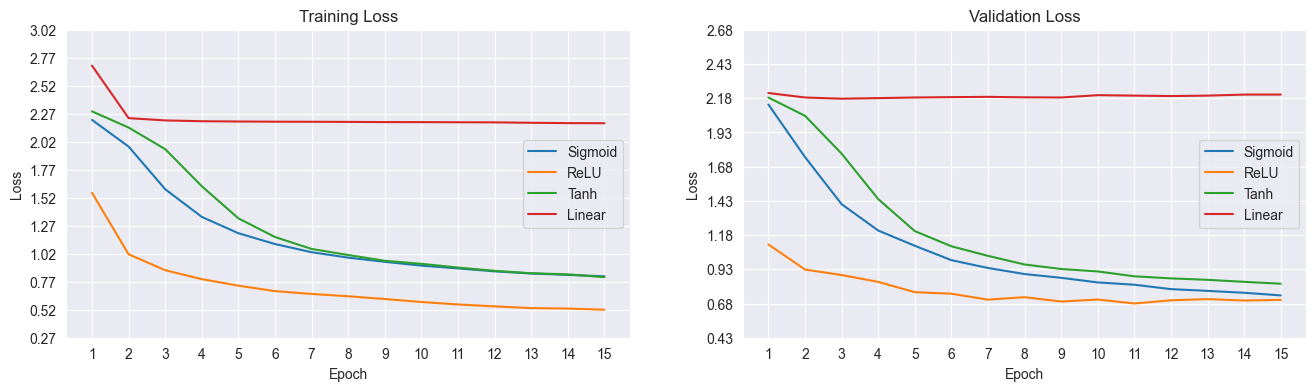

In [43]:
plt.subplots(1, 2, figsize=(16, 4))

xticks = np.arange(1, 16)
flattened0 = losses[:, :, 0].flatten()
flattened1 = losses[:, :, 1].flatten()

plt.subplot(1, 2, 1)
plt.title("Training Loss")
plt.plot(xticks, losses[:, 0, 0], label="Sigmoid")
plt.plot(xticks, losses[:, 1, 0], label="ReLU")
plt.plot(xticks, losses[:, 2, 0], label="Tanh")
plt.plot(xticks, losses[:, 3, 0], label="Linear")
plt.xticks(xticks)
plt.yticks(np.arange(np.min(flattened0)-0.25, np.max(flattened0)+0.5, 0.25))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Validation Loss")
plt.plot(xticks, losses[:, 0, 1], label="Sigmoid")
plt.plot(xticks, losses[:, 1, 1], label="ReLU")
plt.plot(xticks, losses[:, 2, 1], label="Tanh")
plt.plot(xticks, losses[:, 3, 1], label="Linear")
plt.xticks(xticks)
plt.yticks(np.arange(np.min(flattened1)-0.25, np.max(flattened1)+0.5, 0.25))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [44]:
scores = pd.DataFrame({
    "Validation": [
        clf_sigmoid.score(x_val, y_val), clf_relu.score(x_val, y_val),
        clf_tanh.score(x_val, y_val), clf_linear.score(x_val, y_val),
    ],
    "Test": [
        clf_sigmoid.score(x_test, y_test), clf_relu.score(x_test, y_test),
        clf_tanh.score(x_test, y_test), clf_linear.score(x_test, y_test),
    ]
}, index=["Sigmoid", "ReLU", "Tanh", "Linear"])

scores

,Validation,Test
Sigmoid,0.770953,0.764810
ReLU,0.806511,0.810401
Tanh,0.744676,0.735872
Linear,0.236623,0.221949


#### **Analysis of the models**

Not all models are able to learn effectively. \
Specifically, the model with the linear activation function is not able to learn at all. This is because the linear activation function is not able to learn non-linear decision boundaries between the 10 classes. \
The sigmoid and tanh functions learn pretty equally effectively and are able to achieve a good validation score. Given sufficient number of epochs, it looks like the tanh function will outperform the sigmoif function as the sigmoid function loss saturates at around 15 epochs. \
The ReLU function is able to learn the fastest and achieves the best validation score.

#### **Best Accuracy of the models**

The best accuracy on the test set is achieved by the ReLU Activation Function. It acheives a *decent* accuracy score of 0.8105. I obtained the other hyperparameters like `batch_size`, `hidden_layer_sizes`, and `alpha` using the GridSearchCV function. \
The dataset was first preprocessed to be compatible with the neural net.

###  **Visualization of Incorrect Predictions**

#### **Visualization of 3 misclassified images for each class**

To check the performance of the model, we visualize 3 misclassified images for each class. This is done for the best performing model.

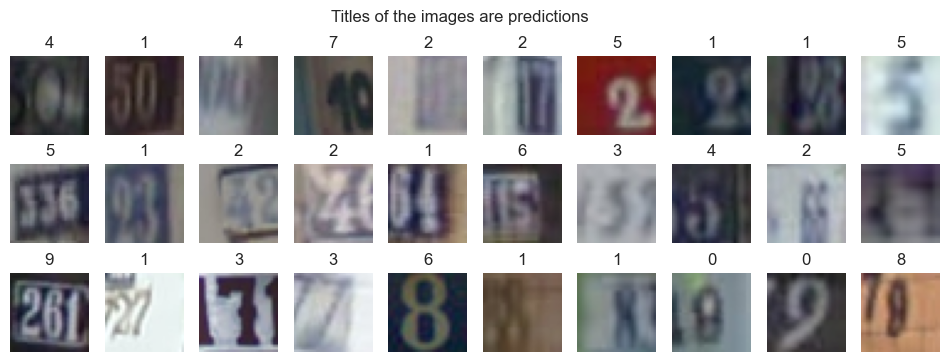

In [63]:
plt.subplots(3, 10, figsize=(12, 4))

for i in range(10):
    class_i = np.where(y_test == i)[0]
    predictions = clf_star.predict(x_test)
    misclassified = np.where(predictions != y_test)[0]
    for j in range(3):
        plt.subplot(3, 10, i*3+j+1)
        index = np.random.choice(np.intersect1d(class_i, misclassified))
        image = x_test[index] * std_scaler.scale_ + std_scaler.mean_
        plt.imshow(image.reshape(32, 32, 3).astype(int))
        plt.title(str(predictions[index]))
        plt.axis("off")

plt.suptitle("Titles of the images are predictions")
plt.show()

#### **Possible reasons for missclassification**

A few possible reasons for misclassification are: 
- Some misclassified images are too blur or too dark
- In some cases, the image actually looks more like the predicted class rather than its true class
- In some cases, there are too many numbers in an image, so it has a higher chance of getting misclassified
- Another reason could be the fact that the model is not complex enough to learn the data. First, we can try increasing the number of epochs of model training, as clearly, the loss is still not saturated. Moreover, one can try increasing the number of hidden layers in the model.